In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df_ind_results = pd.read_csv("individual_competition_data.csv",delimiter=";",parse_dates=["Date_of_competition"])

In [245]:
df_ind_results.head()

,Rank,Athlete,Country,Distance_1,Distance_2,Total_Points,Date_of_competition,Name_of_competition
0,1,KRAFT Stefan,Austria,144,143,326.2,2023-11-25,"Ruka (HS-142), Finlandia"
1,2,PASCHKE Pius,Niemcy,142,142.5,315.6,2023-11-25,"Ruka (HS-142), Finlandia"
2,3,LEYHE Stephan,Niemcy,137,143.5,313.2,2023-11-25,"Ruka (HS-142), Finlandia"
3,4,WELLINGER Andreas,Niemcy,142,136,311.5,2023-11-25,"Ruka (HS-142), Finlandia"
4,5,TSCHOFENIG Daniel,Austria,136,140.5,310.3,2023-11-25,"Ruka (HS-142), Finlandia"


In [246]:
len(df_ind_results["Date_of_competition"].unique())

31

In [247]:
df_ind_results.dtypes

Rank                           object
Athlete                        object
Country                        object
Distance_1                     object
Distance_2                     object
Total_Points                   object
Date_of_competition    datetime64[ns]
Name_of_competition            object
dtype: object

In [248]:
# check how many rows contains "-"
df_ind_results.loc[:,["Distance_1","Distance_2","Total_Points"]].apply(lambda x: x.str.contains("-")).sum()

Distance_1        6
Distance_2      568
Total_Points     26
dtype: int64

In [249]:
# replace "-" by np.nan
df_ind_results.loc[:,["Distance_1",'Distance_2',"Total_Points"]] = df_ind_results.loc[:,["Distance_1","Distance_2","Total_Points"]].replace("-",np.nan)

In [250]:
df_ind_results.isnull().sum()

Rank                     0
Athlete                  0
Country                  0
Distance_1               6
Distance_2             568
Total_Points            26
Date_of_competition      0
Name_of_competition      0
dtype: int64

In [251]:
# change data type of colums Distance_1, Distance_2, Total_Points to float
df_ind_results = df_ind_results.astype({'Distance_1': 'float','Distance_2': 'float','Total_Points':'float'})

In [252]:
df_ind_results.dtypes

Rank                           object
Athlete                        object
Country                        object
Distance_1                    float64
Distance_2                    float64
Total_Points                  float64
Date_of_competition    datetime64[ns]
Name_of_competition            object
dtype: object

In [253]:
# split Name_of_competition by space to get Hill_name","Hill_size","Hill_country
df_ind_results[["Hill_name","Hill_size","Hill_country"]] = df_ind_results["Name_of_competition"].str.split(" ",expand=True).iloc[:,[0,1,2]]

In [254]:
df_ind_results.head()

,Rank,Athlete,Country,Distance_1,Distance_2,Total_Points,Date_of_competition,Name_of_competition,Hill_name,Hill_size,Hill_country
0,1,KRAFT Stefan,Austria,144.0,143.0,326.2,2023-11-25,"Ruka (HS-142), Finlandia",Ruka,"(HS-142),",Finlandia
1,2,PASCHKE Pius,Niemcy,142.0,142.5,315.6,2023-11-25,"Ruka (HS-142), Finlandia",Ruka,"(HS-142),",Finlandia
2,3,LEYHE Stephan,Niemcy,137.0,143.5,313.2,2023-11-25,"Ruka (HS-142), Finlandia",Ruka,"(HS-142),",Finlandia
3,4,WELLINGER Andreas,Niemcy,142.0,136.0,311.5,2023-11-25,"Ruka (HS-142), Finlandia",Ruka,"(HS-142),",Finlandia
4,5,TSCHOFENIG Daniel,Austria,136.0,140.5,310.3,2023-11-25,"Ruka (HS-142), Finlandia",Ruka,"(HS-142),",Finlandia


In [255]:
# exception for Lake Placid as it is two part space separated string 
df_lake_placid = df_ind_results.loc[df_ind_results["Name_of_competition"]=="Lake Placid (HS-128), USA"]

In [256]:
df_non_lp = df_ind_results.loc[df_ind_results["Name_of_competition"]!="Lake Placid (HS-128), USA"]

In [257]:
temp_df = df_lake_placid["Name_of_competition"].str.split(r'(^[^\s]+\s+[^\s]+)\s+', expand=True).iloc[:,[1,2]]

In [258]:
df_lake_placid["Hill_name"] = temp_df.iloc[:, 0] 
df_lake_placid["Temp_col"] = temp_df.iloc[:, 1]

C:\Users\Paweł\AppData\Local\Temp\ipykernel_21620\3919474554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lake_placid["Hill_name"] = temp_df.iloc[:, 0]
C:\Users\Paweł\AppData\Local\Temp\ipykernel_21620\3919474554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lake_placid["Temp_col"] = temp_df.iloc[:, 1]


In [259]:
df_lake_placid.head(3)

,Rank,Athlete,Country,Distance_1,Distance_2,Total_Points,Date_of_competition,Name_of_competition,Hill_name,Hill_size,Hill_country,Temp_col
801,1,KOS Lovro,Słowenia,123.5,125.0,278.9,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,Placid,"(HS-128),","(HS-128), USA"
802,2,KOBAYASHI Ryoyu,Japonia,125.5,122.0,278.1,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,Placid,"(HS-128),","(HS-128), USA"
803,3,LINDVIK Marius,Norwegia,121.5,133.0,277.8,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,Placid,"(HS-128),","(HS-128), USA"


In [260]:
df_lake_placid[["Hill_size","Hill_country"]] = df_lake_placid["Temp_col"].str.split(",",expand=True)

C:\Users\Paweł\AppData\Local\Temp\ipykernel_21620\3461040930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lake_placid[["Hill_size","Hill_country"]] = df_lake_placid["Temp_col"].str.split(",",expand=True)


In [261]:
df_lake_placid.drop(columns=["Temp_col"], inplace=True)

C:\Users\Paweł\AppData\Local\Temp\ipykernel_21620\3441383405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lake_placid.drop(columns=["Temp_col"], inplace=True)


In [262]:
df_lake_placid.head()

,Rank,Athlete,Country,Distance_1,Distance_2,Total_Points,Date_of_competition,Name_of_competition,Hill_name,Hill_size,Hill_country
801,1,KOS Lovro,Słowenia,123.5,125.0,278.9,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,(HS-128),USA
802,2,KOBAYASHI Ryoyu,Japonia,125.5,122.0,278.1,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,(HS-128),USA
803,3,LINDVIK Marius,Norwegia,121.5,133.0,277.8,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,(HS-128),USA
804,4,HAYBOECK Michael,Austria,125.0,123.5,275.8,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,(HS-128),USA
805,5,HUBER Daniel,Austria,121.5,129.0,275.2,2024-02-10,"Lake Placid (HS-128), USA",Lake Placid,(HS-128),USA


In [263]:
df_lake_placid.dtypes

Rank                           object
Athlete                        object
Country                        object
Distance_1                    float64
Distance_2                    float64
Total_Points                  float64
Date_of_competition    datetime64[ns]
Name_of_competition            object
Hill_name                      object
Hill_size                      object
Hill_country                   object
dtype: object

In [264]:
#import missing world cup competition
df_vikersund = pd.read_csv("I:\Projects\Skoki Narciarskie Sezon 2023_2024\individual_competition_data_vikersund_1.csv",delimiter=";",parse_dates=["Date_of_competition"])

In [265]:
df_vikersund["Rank"] = df_vikersund["Rank"].fillna(0)

In [266]:
df_vikersund.iloc[-1,3] = 0
df_vikersund.iloc[-1,5] = 0

In [267]:
df_vikersund = df_vikersund.astype({"Rank":"object","Distance_1":"float64","Distance_2":"float64","Total_Points":"float64"})

In [268]:
df_vikersund[["Hill_name","Hill_size","Hill_country"]] = df_vikersund["Name_of_competition"].str.split(" ",expand=True).iloc[:,[0,1,2]]

In [269]:
df_ind_results_copy = df_ind_results.copy()

In [270]:
df_ind_results = pd.concat([df_non_lp,df_lake_placid,df_vikersund],ignore_index=True)

In [271]:
# cleaning Hill_size column to get only hill size value
df_ind_results["Hill_size"] = df_ind_results["Hill_size"].str.replace("[\(\)\,HS\-]", "", regex=True)

In [272]:
# round Total_Points column to one decimal place
df_ind_results["Total_Points"] = df_ind_results["Total_Points"].round(1)

In [273]:
df_ind_results.dtypes

Rank                           object
Athlete                        object
Country                        object
Distance_1                    float64
Distance_2                    float64
Total_Points                  float64
Date_of_competition    datetime64[ns]
Name_of_competition            object
Hill_name                      object
Hill_size                      object
Hill_country                   object
dtype: object

In [274]:
df_ind_results["Hill_size"] = df_ind_results["Hill_size"].astype("int")

In [275]:
df_ind_results["Hill_size"].dtypes

dtype('int32')

In [278]:
# replace DNS and DSQ by 50 for Normal and large hill, and by 40 for Sky-Flying hill
df_ind_results.loc[(df_ind_results["Rank"].isin(["DNS","DSQ"])) & (df_ind_results["Hill_size"] >=200), "Rank"] = 40
df_ind_results.loc[(df_ind_results["Rank"].isin(["DNS","DSQ"])) & (df_ind_results["Hill_size"] <200), "Rank"] = 50

In [279]:
df_ind_results.sample(3)

,Rank,Athlete,Country,Distance_1,Distance_2,Total_Points,Date_of_competition,Name_of_competition,Hill_name,Hill_size,Hill_country
1451,20,ZAJC Timi,Słowenia,122.5,118.0,242.3,2024-02-11,"Lake Placid (HS-128), USA",Lake Placid,128,USA
951,11,STOCH Kamil,Polska,219.0,221.5,403.8,2024-02-25,"Oberstdorf (HS-235), Niemcy",Oberstdorf,235,Niemcy
1326,16,INSAM Alex,Włochy,220.0,220.0,401.3,2024-03-22,"Planica (HS-240), Słowenia",Planica,240,Słowenia


In [280]:
# add new column with hill type
df_ind_results["Hill_type"] = df_ind_results.apply(lambda x: "Normal" if x["Hill_size"] <= 110 else 
                     ("Large" if (x["Hill_size"] > 110 and x["Hill_size"] < 160) else "Sky-flying"),
                     axis=1)

In [281]:
# get scoring data from wikipedia
url = "https://en.wikipedia.org/wiki/FIS_Ski_Jumping_World_Cup"
df_scoring_system = pd.read_html(url)[5]

In [282]:
# select only relevant scoring system and transform into dataframe
df_scoring_system = df_scoring_system.iloc[1,1:].to_frame().reset_index()

In [283]:
# rename columns
df_scoring_system.rename(columns={"index":"Place", 1:"Points"}, inplace=True)

In [284]:
df_scoring_system

,Place,Points
0,1,100
1,2,80
2,3,60
3,4,50
4,5,45
5,6,40
6,7,36
7,8,32
8,9,29
9,10,26


In [285]:
df_scoring_system.dtypes

Place     object
Points    object
dtype: object

In [286]:
# change datatype from object to int
df_scoring_system = df_scoring_system.astype({"Place":"int","Points":"int"})

In [289]:
df_ind_results["Rank"] = df_ind_results["Rank"].astype("int")

In [290]:
df_ind_res = df_ind_results.loc[:,["Rank","Athlete","Date_of_competition","Hill_name"]]

In [291]:
#check values in Rank columns
df_ind_res["Rank"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 20, 51,
        0])

In [292]:
df_ind_res.loc[df_ind_res["Rank"] == 0]

,Rank,Athlete,Date_of_competition,Hill_name
1521,0,OESTVOLD Benjamin,2024-03-17,Vikersund


In [293]:
df_ind_res.iloc[1521,0] = 40

In [78]:
# replace DSQ and DNS by 0
df_ind_res["Rank"] = df_ind_res["Rank"].replace("[A-Z]", 0, regex=True)

In [294]:
df_ind_res

,Rank,Athlete,Date_of_competition,Hill_name
0,1,KRAFT Stefan,2023-11-25,Ruka
1,2,PASCHKE Pius,2023-11-25,Ruka
2,3,LEYHE Stephan,2023-11-25,Ruka
3,4,WELLINGER Andreas,2023-11-25,Ruka
4,5,TSCHOFENIG Daniel,2023-11-25,Ruka
...,...,...,...,...
1517,36,NIKAIDO Ren,2024-03-17,Vikersund
1518,37,AALTO Antti,2024-03-17,Vikersund
1519,38,KUBACKI Dawid,2024-03-17,Vikersund
1520,39,GEIGER Karl,2024-03-17,Vikersund


In [80]:
# import data with 2023/2024 world cup standings
df_wc_standings = pd.read_csv("individual_wc_standings.csv",delimiter=";")

In [81]:
df_wc_standings_subset = df_wc_standings.loc[:,["Rank","Athlete","Points"]]

In [295]:
df_wc_standings_subset

,Rank,Athlete,Points
0,1,KRAFT Stefan,2149
1,2,KOBAYASHI Ryoyu,1673
2,3,WELLINGER Andreas,1488
3,4,HOERL Jan,1140
4,5,PREVC Peter,1071
...,...,...,...
62,63,URLAUB Andrew,4
63,64,CAMPREGHER Andrea,3
64,64,IPCIOGLU Fatih Arda,3
65,64,SATO Keiichi,3


In [296]:
# join detaframe with world cup standings
df_competition_standings = pd.merge(df_ind_res, df_wc_standings_subset, on="Athlete", how="left", suffixes=("_competiton","_wc"))

In [297]:
df_competition_standings.loc[df_competition_standings["Athlete"] == "KRAFT Stefan"]

,Rank_competiton,Athlete,Date_of_competition,Hill_name,Rank_wc,Points
0,1,KRAFT Stefan,2023-11-25,Ruka,1.0,2149.0
50,1,KRAFT Stefan,2023-11-26,Ruka,1.0,2149.0
100,1,KRAFT Stefan,2023-12-02,Lillehammer,1.0,2149.0
150,1,KRAFT Stefan,2023-12-03,Lillehammer,1.0,2149.0
201,2,KRAFT Stefan,2023-12-09,Klingenthal,1.0,2149.0
258,9,KRAFT Stefan,2023-12-10,Klingenthal,1.0,2149.0
302,3,KRAFT Stefan,2023-12-16,Engelberg,1.0,2149.0
350,1,KRAFT Stefan,2023-12-17,Engelberg,1.0,2149.0
403,3,KRAFT Stefan,2023-12-29,Oberstdorf,1.0,2149.0
456,6,KRAFT Stefan,2024-01-01,Garmisch-Partenkirchen,1.0,2149.0


In [298]:
df_competition_standings.dtypes

Rank_competiton                 int32
Athlete                        object
Date_of_competition    datetime64[ns]
Hill_name                      object
Rank_wc                       float64
Points                        float64
dtype: object

In [299]:
df_competition_standings.isna().sum()

Rank_competiton         0
Athlete                 0
Date_of_competition     0
Hill_name               0
Rank_wc                96
Points                 96
dtype: int64

In [300]:
df_competition_standings = df_competition_standings.dropna()

In [301]:
df_competition_standings = df_competition_standings.astype({"Rank_competiton":"int32","Rank_wc":"int32","Points":"int32"})

In [302]:
# filter only top 12 ski jumpers in world cup standings
df_comp_stand_subset = df_competition_standings.loc[df_competition_standings["Rank_wc"] <= 12]

In [303]:
df_comp_stand_subset.Rank_wc.unique()

array([ 1, 10,  3, 11,  2,  6,  4,  5,  8, 12,  7,  9])

In [304]:
df_comp_stand_subset.dtypes

Rank_competiton                 int32
Athlete                        object
Date_of_competition    datetime64[ns]
Hill_name                      object
Rank_wc                         int32
Points                          int32
dtype: object

In [305]:
# join scoring system dataframe
df_stand_merged = pd.merge(df_comp_stand_subset,df_scoring_system,left_on="Rank_competiton", right_on="Place", how="left",suffixes=["_wc","_scoring"])

In [306]:
df_stand_merged.isnull().sum()

Rank_competiton         0
Athlete                 0
Date_of_competition     0
Hill_name               0
Rank_wc                 0
Points_wc               0
Place                  22
Points_scoring         22
dtype: int64

In [307]:
# fill null values with 0
df_stand_merged.fillna({"Place":0,"Points_scoring":0},inplace=True)

In [308]:
df_stand_merged = df_stand_merged.astype({"Points_scoring":"int32"})

In [309]:
df_stand_merged.rename(columns={"Points_scoring":"Points_competiton"},inplace=True)

In [310]:
df_stand_merged

,Rank_competiton,Athlete,Date_of_competition,Hill_name,Rank_wc,Points_wc,Place,Points_competiton
0,1,KRAFT Stefan,2023-11-25,Ruka,1,2149,1.0,100
1,2,PASCHKE Pius,2023-11-25,Ruka,10,778,2.0,80
2,4,WELLINGER Andreas,2023-11-25,Ruka,3,1488,4.0,50
3,5,TSCHOFENIG Daniel,2023-11-25,Ruka,11,747,5.0,45
4,6,KOBAYASHI Ryoyu,2023-11-25,Ruka,2,1673,6.0,40
...,...,...,...,...,...,...,...,...
367,18,KOS Lovro,2024-03-17,Vikersund,9,792,18.0,13
368,22,FORFANG Johann Andre,2024-03-17,Vikersund,7,867,22.0,9
369,24,HOERL Jan,2024-03-17,Vikersund,4,1140,24.0,7
370,26,LINDVIK Marius,2024-03-17,Vikersund,8,854,26.0,5


In [311]:
df_stand_merged.loc[df_stand_merged["Athlete"] == 'KRAFT Stefan']

,Rank_competiton,Athlete,Date_of_competition,Hill_name,Rank_wc,Points_wc,Place,Points_competiton
0,1,KRAFT Stefan,2023-11-25,Ruka,1,2149,1.0,100
11,1,KRAFT Stefan,2023-11-26,Ruka,1,2149,1.0,100
22,1,KRAFT Stefan,2023-12-02,Lillehammer,1,2149,1.0,100
33,1,KRAFT Stefan,2023-12-03,Lillehammer,1,2149,1.0,100
44,2,KRAFT Stefan,2023-12-09,Klingenthal,1,2149,2.0,80
61,9,KRAFT Stefan,2023-12-10,Klingenthal,1,2149,9.0,29
70,3,KRAFT Stefan,2023-12-16,Engelberg,1,2149,3.0,60
80,1,KRAFT Stefan,2023-12-17,Engelberg,1,2149,1.0,100
94,3,KRAFT Stefan,2023-12-29,Oberstdorf,1,2149,3.0,60
108,6,KRAFT Stefan,2024-01-01,Garmisch-Partenkirchen,1,2149,6.0,40


In [312]:
df_stand_merged.dtypes

Rank_competiton                 int32
Athlete                        object
Date_of_competition    datetime64[ns]
Hill_name                      object
Rank_wc                         int32
Points_wc                       int32
Place                         float64
Points_competiton               int32
dtype: object

In [313]:
df_stand_merged = df_stand_merged.astype({"Place":"int32"})

In [314]:
df_filtered = df_stand_merged.loc[:,["Rank_wc","Date_of_competition","Athlete","Place","Points_competiton"]].reset_index(drop=True)

In [315]:
df_filtered = df_filtered.sort_values(by=["Rank_wc","Date_of_competition"]).reset_index(drop=True)

In [336]:
df_filtered.head()

,Rank_wc,Date_of_competition,Athlete,Place,Points_competiton
0,1,2023-11-25,KRAFT Stefan,1,100
1,1,2023-11-26,KRAFT Stefan,1,100
2,1,2023-12-02,KRAFT Stefan,1,100
3,1,2023-12-03,KRAFT Stefan,1,100
4,1,2023-12-09,KRAFT Stefan,2,80


In [316]:
df_filtered.dtypes

Rank_wc                         int32
Date_of_competition    datetime64[ns]
Athlete                        object
Place                           int32
Points_competiton               int32
dtype: object

In [317]:
# create data frame with world cup wins
df_wins = df_filtered.loc[df_filtered["Place"] == 1]

In [318]:
#calculate no of wins
df_wins_grouped = df_wins.groupby('Athlete').agg(No_of_wins=("Place","count")).reset_index()

In [319]:
df_grouped = df_filtered.groupby("Athlete")[["Points_competiton"]].agg(Total_points_wc=("Points_competiton","sum")).reset_index()

In [320]:
df_grouped = df_grouped.sort_values(by="Total_points_wc", ascending=False).reset_index(drop=True)

In [321]:
df_grouped

,Athlete,Total_points_wc
0,KRAFT Stefan,2149
1,KOBAYASHI Ryoyu,1673
2,WELLINGER Andreas,1488
3,HOERL Jan,1140
4,PREVC Peter,1071
5,HAYBOECK Michael,882
6,FORFANG Johann Andre,867
7,LINDVIK Marius,854
8,KOS Lovro,792
9,PASCHKE Pius,778


In [322]:
df_grouped = pd.merge(df_grouped,df_wc_standings_subset,how="left",on="Athlete")

In [323]:
df_grouped = pd.merge(df_grouped,df_wins_grouped, how="left", on="Athlete")

In [324]:
df_grouped.fillna({"No_of_wins":0},inplace=True)

In [325]:
df_grouped = df_grouped.astype({"No_of_wins":"int32"})

In [329]:
df_grouped = df_grouped.iloc[:,[0,2,1,4]]

In [330]:
df_grouped

,Athlete,Rank,Total_points_wc,No_of_wins
0,KRAFT Stefan,1,2149,13
1,KOBAYASHI Ryoyu,2,1673,2
2,WELLINGER Andreas,3,1488,2
3,HOERL Jan,4,1140,2
4,PREVC Peter,5,1071,1
5,HAYBOECK Michael,6,882,0
6,FORFANG Johann Andre,7,867,2
7,LINDVIK Marius,8,854,0
8,KOS Lovro,9,792,2
9,PASCHKE Pius,10,778,1


In [415]:
# import data with 2023/2024 world cup standings
df_wc_standings = pd.read_csv("individual_wc_standings.csv",delimiter=";")

In [420]:
df_athletes_nationality = df_wc_standings.loc[df_wc_standings["Rank"] <= 12,["Rank",'Athlete','Country']]

In [424]:
df_grouped = pd.merge(df_grouped, df_athletes_nationality, how="left", on="Athlete",suffixes=["_gr","_nat"])

In [425]:
df_grouped.dtypes

Athlete            object
Rank_gr             int64
Total_points_wc     int32
No_of_wins          int32
Rank_nat            int64
Country            object
dtype: object

In [427]:
df_grouped = df_grouped.loc[:,["Athlete","Rank_gr","Total_points_wc","No_of_wins","Country"]]
df_grouped.rename(columns={"Rank_gr":"Rank","Total_points_wc":"Total_points"},inplace=True)

In [428]:
df_grouped

,Athlete,Rank,Total_points,No_of_wins,Country
0,KRAFT Stefan,1,2149,13,Austria
1,KOBAYASHI Ryoyu,2,1673,2,Japonia
2,WELLINGER Andreas,3,1488,2,Niemcy
3,HOERL Jan,4,1140,2,Austria
4,PREVC Peter,5,1071,1,Słowenia
5,HAYBOECK Michael,6,882,0,Austria
6,FORFANG Johann Andre,7,867,2,Norwegia
7,LINDVIK Marius,8,854,0,Norwegia
8,KOS Lovro,9,792,2,Słowenia
9,PASCHKE Pius,10,778,1,Niemcy


In [438]:
# create dictionary with countries flags
flag_mapper = {"Austria":"I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Austria.svg.png",
               "Japonia":"I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Japan.svg.png",
               "Niemcy":"I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Germany.svg.png",
               "Norwegia":"I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Norway.svg.png",
               "Słowenia":"I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Slovenia.svg.png"}

In [439]:
# map flags url for each ski jumper
df_grouped["Flag_url"] = df_grouped["Country"].map(flag_mapper)

In [440]:
df_grouped["Flag_url"].unique()

array(['I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Austria.svg.png',
       'I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Japan.svg.png',
       'I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Germany.svg.png',
       'I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Slovenia.svg.png',
       'I:/Projects/Skoki Narciarskie Sezon 2023_2024/flags/Flag_of_Norway.svg.png'],
      dtype=object)

In [468]:
# split Athlete column to obtain Name and Last name in title format
df_grouped["Name"] = df_grouped["Athlete"].str.split(r"[A-Z]+\s", regex=True, expand=True).iloc[:,1].str.strip()
df_grouped["Last_name"] = df_grouped["Athlete"].str.split(r"\s+\w+", regex=True, expand=True).iloc[:,0].str.title().str.strip()

In [473]:
df_grouped["Athlete"] = df_grouped["Name"] + " " + df_grouped["Last_name"]

In [475]:
df_grouped.drop(columns=["Name","Last_name"],inplace=True)

In [476]:
df_grouped

,Athlete,Rank,Total_points,No_of_wins,Country,Flag_url
0,Stefan Kraft,1,2149,13,Austria,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
1,Ryoyu Kobayashi,2,1673,2,Japonia,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
2,Andreas Wellinger,3,1488,2,Niemcy,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
3,Jan Hoerl,4,1140,2,Austria,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
4,Peter Prevc,5,1071,1,Słowenia,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
5,Michael Hayboeck,6,882,0,Austria,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
6,Johann Andre Forfang,7,867,2,Norwegia,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
7,Marius Lindvik,8,854,0,Norwegia,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
8,Lovro Kos,9,792,2,Słowenia,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...
9,Pius Paschke,10,778,1,Niemcy,I:/Projects/Skoki Narciarskie Sezon 2023_2024/...


In [479]:
df_filtered["Name"] = df_filtered["Athlete"].str.split(r"[A-Z]+\s", regex=True, expand=True).iloc[:,1].str.strip()
df_filtered["Last_name"] = df_filtered["Athlete"].str.split(r"\s+\w+", regex=True, expand=True).iloc[:,0].str.title().str.strip()

In [482]:
df_filtered

,Rank_wc,Date_of_competition,Athlete,Place,Points_competiton,Name,Last_name
0,1,2023-11-25,KRAFT Stefan,1,100,Stefan,Kraft
1,1,2023-11-26,KRAFT Stefan,1,100,Stefan,Kraft
2,1,2023-12-02,KRAFT Stefan,1,100,Stefan,Kraft
3,1,2023-12-03,KRAFT Stefan,1,100,Stefan,Kraft
4,1,2023-12-09,KRAFT Stefan,2,80,Stefan,Kraft
...,...,...,...,...,...,...,...
367,12,2024-03-13,FETTNER Manuel,22,9,Manuel,Fettner
368,12,2024-03-17,FETTNER Manuel,19,12,Manuel,Fettner
369,12,2024-03-17,FETTNER Manuel,0,0,Manuel,Fettner
370,12,2024-03-22,FETTNER Manuel,0,0,Manuel,Fettner


In [484]:
df_filtered["Athlete"] = df_filtered["Name"] + " " + df_filtered["Last_name"]
df_filtered.drop(columns=["Name","Last_name"],inplace=True)

In [485]:
df_filtered

,Rank_wc,Date_of_competition,Athlete,Place,Points_competiton
0,1,2023-11-25,Stefan Kraft,1,100
1,1,2023-11-26,Stefan Kraft,1,100
2,1,2023-12-02,Stefan Kraft,1,100
3,1,2023-12-03,Stefan Kraft,1,100
4,1,2023-12-09,Stefan Kraft,2,80
...,...,...,...,...,...
367,12,2024-03-13,Manuel Fettner,22,9
368,12,2024-03-17,Manuel Fettner,19,12
369,12,2024-03-17,Manuel Fettner,0,0
370,12,2024-03-22,Manuel Fettner,0,0


In [412]:
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

from PIL import Image
import urllib
import json
import os

In [529]:
def plot_gk_xgot(ax, athlete_highlight, label_x=True, label_y=False):
    ax.grid(True)
    ax.grid(ls='--', color='#DCDCDC', zorder=2)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    for x in df_filtered['Athlete'].unique():
        aux_df = df_filtered[df_filtered['Athlete'] == x].reset_index(drop=True)
        if x == athlete_highlight:
            ax.plot(aux_df.index, aux_df['Points_competiton'], lw=1, color='#D2691E', zorder=5, markevery=[-1], marker='o', ms=4, mfc='white', alpha=0.8)
        else:
            ax.plot(aux_df.index, aux_df['Points_competiton'], lw=.5, color='grey', alpha=0.25)

    
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [50,50], color='black', ls='dashed', lw=0.5)

    ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], 
                    y1=50, y2=ax.get_ylim()[1], color='#336699', alpha=0.05, ec='None', hatch='......', zorder=1)
    ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], 
                    y1=50, y2=ax.get_ylim()[0], color='#DA4167', alpha=0.05, ec='None', hatch='......', zorder=1)
    
    if label_x:
        ax.set_xlabel("Numeracja Konkursu PŚ")
    else:
        ax.set_xticklabels([])
    if label_y:
        ax.set_ylabel("Zobyte punkty PŚ")
    else:
        ax.set_yticklabels([])
    return ax

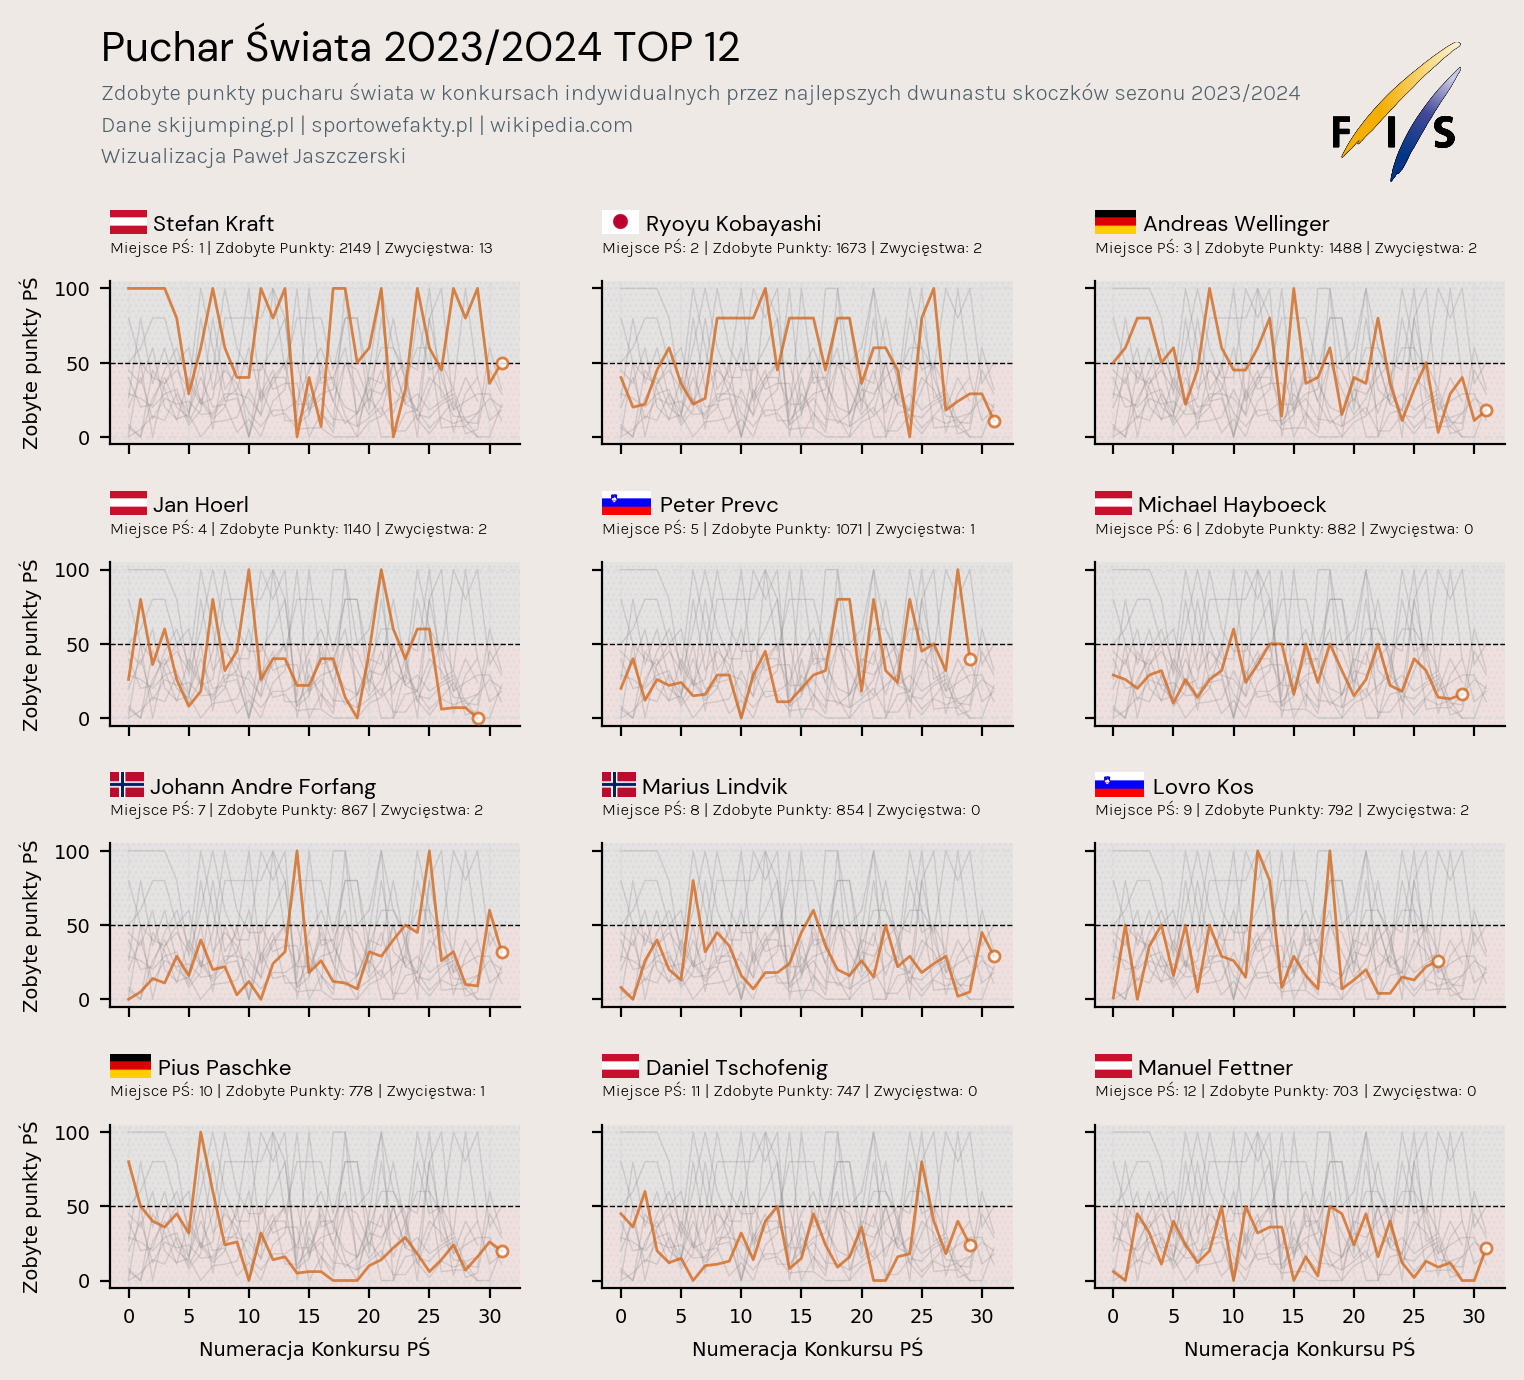

In [540]:
fig = plt.figure(figsize=(9, 7), facecolor="#EFE9E6", dpi = 200)
nrows = 8
ncols = 3
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios = [(1/nrows)*2.6 if x % 2 != 0 else (1/nrows)/2.6 for x in range(nrows)], hspace=0.5
)

plt.rcParams['font.size'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['hatch.linewidth'] = 0.5

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )
            athlete = df_grouped['Athlete'].iloc[plot_counter]
            if col == 0:
                label_y = True
            else:
                label_y = False
            if row == 7:
                label_x = True
            else:
                label_x = False
            
            plot_gk_xgot(ax, athlete, label_x, label_y)           
            plot_counter += 1
        else:
            athleteName = df_grouped["Athlete"].iloc[logo_counter]
            rank = df_grouped["Rank"].iloc[logo_counter]
            points = df_grouped["Total_points"].iloc[logo_counter]
            wins = df_grouped["No_of_wins"].iloc[logo_counter]
            flag_url = mpimg.imread(df_grouped["Flag_url"].iloc[logo_counter])
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW', facecolor = '#EFE9E6'
            )
            
            logo_ax.imshow(flag_url)
            logo_ax.axis("off")

            fis_logo = Image.open("I:/Projects/Skoki Narciarskie Sezon 2023_2024/FIS_Ski.png")
            fis_ax = fig.add_axes([0.79, 0.90, 0.1, 0.1], zorder = 1)
            fis_ax.imshow(fis_logo)
            fis_ax.axis("off")

            ax_text(
                x = 1.2,
                y = 0.8,
                s = athleteName,
                ax = logo_ax,
                weight = "heavy", size=8,
                font = 'DM Sans', 
                ha = 'left',
                annotationbbox_kw = {'xycoords':'axes fraction'}

            )

            ax_text(
                x = 0, 
                y = .3,
                s = f'\nMiejsce PŚ: <{rank}> | Zdobyte Punkty: <{points}> | Zwycięstwa: <{wins}>',
                ax = logo_ax, 
                highlight_textprops=[
                    {'weight':'bold'},
                    {'weight':'bold'},
                    {'weight':'bold'}],
                font = 'Karla', 
                ha = 'left', 
                size = 6, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )
            logo_counter += 1
fig_text(
    x=0.12, y=0.98,
    s="Puchar Świata 2023/2024 TOP 12",
    va='bottom', ha='left',
    fontsize=15, color='black', font="DM Sans", weight='bold'
)
fig_text(
    x=0.12, y=0.91,
    s='Zdobyte punkty pucharu świata w konkursach indywidualnych przez najlepszych dwunastu skoczków sezonu 2023/2024\nDane skijumping.pl | sportowefakty.pl | wikipedia.com\nWizualizacja Paweł Jaszczerski',
    va='bottom', ha='left',
	fontsize=8, color='#4E616C', font='Karla'
)

plt.savefig(
	"wc_top_12_23_24.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)